In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

In [2]:
df = pd.read_csv('../data/fenomeno/stereotipi/Accettabilità violenza nella coppia - età (2018).csv')
df = df[["SEXISTAT1", "Classe di età", "Stereotipi sui ruoli di genere, comportamenti nella coppia", "Grado di accettabilità", "Value"]]
df.head()

,SEXISTAT1,Classe di età,"Stereotipi sui ruoli di genere, comportamenti nella coppia",Grado di accettabilità,Value
0,M,30-44 anni,un ragazzo schiaffeggia la sua fidanzata perch...,totale,100.0
1,M,30-44 anni,in una relazione di coppia è normale che ci sc...,totale,100.0
2,M,30-44 anni,"un uomo controlla abitualmente il cellulare,l’...",totale,100.0
3,F,30-44 anni,un ragazzo schiaffeggia la sua fidanzata perch...,totale,100.0
4,F,30-44 anni,in una relazione di coppia è normale che ci sc...,totale,100.0


In [3]:
df_male = df[(df["SEXISTAT1"] == "M") & (df["Grado di accettabilità"] != "totale")]
df_female = df[(df["SEXISTAT1"] == "F") & (df["Grado di accettabilità"] != "totale")]

df_female.head()

,SEXISTAT1,Classe di età,"Stereotipi sui ruoli di genere, comportamenti nella coppia",Grado di accettabilità,Value
48,F,30-44 anni,un ragazzo schiaffeggia la sua fidanzata perch...,sempre accettabile,0.2
49,F,30-44 anni,in una relazione di coppia è normale che ci sc...,sempre accettabile,0.0
50,F,30-44 anni,"un uomo controlla abitualmente il cellulare,l’...",sempre accettabile,1.8
57,F,30-44 anni,un ragazzo schiaffeggia la sua fidanzata perch...,in certe circostanze accettabile,5.0
58,F,30-44 anni,in una relazione di coppia è normale che ci sc...,in certe circostanze accettabile,3.7


In [4]:
df_male_tot = df_male[df_male["Classe di età"] == "totale"]#.sort_values(by='STEREOTIPI')
df_female_tot = df_female[df_female["Classe di età"] == "totale"]#.sort_values(by='STEREOTIPI')

df_male_tot.head(10)

,SEXISTAT1,Classe di età,"Stereotipi sui ruoli di genere, comportamenti nella coppia",Grado di accettabilità,Value
81,M,totale,un ragazzo schiaffeggia la sua fidanzata perch...,sempre accettabile,0.3
82,M,totale,in una relazione di coppia è normale che ci sc...,sempre accettabile,0.4
83,M,totale,"un uomo controlla abitualmente il cellulare,l’...",sempre accettabile,0.8
90,M,totale,un ragazzo schiaffeggia la sua fidanzata perch...,in certe circostanze accettabile,8.8
91,M,totale,in una relazione di coppia è normale che ci sc...,in certe circostanze accettabile,7.9
92,M,totale,"un uomo controlla abitualmente il cellulare,l’...",in certe circostanze accettabile,16.7
99,M,totale,un ragazzo schiaffeggia la sua fidanzata perch...,mai accettabile,89.1
100,M,totale,in una relazione di coppia è normale che ci sc...,mai accettabile,90.2
101,M,totale,"un uomo controlla abitualmente il cellulare,l’...",mai accettabile,80.8
108,M,totale,un ragazzo schiaffeggia la sua fidanzata perch...,non risponde,1.8


In [5]:
order = [ "sempre accettabile","in certe circostanze accettabile","mai accettabile"]#, "non risponde"]

female_colors = ["#ce1256","#df65b0","#d7b5d8"]
male_colors = ["#2171b5","#6baed6","#bdd7e7"]

In [6]:
df_male_tot["Stereotipi sui ruoli di genere, comportamenti nella coppia"].unique()

array(['un ragazzo schiaffeggia la sua fidanzata perché ha civettato/flirtato con un altro uomo',
       'in una relazione di coppia è normale che ci scappi uno schiaffo ogni tanto',
       'un uomo controlla abitualmente il cellulare,l’attività sui social network della moglie/compagna'],
      dtype=object)

[]

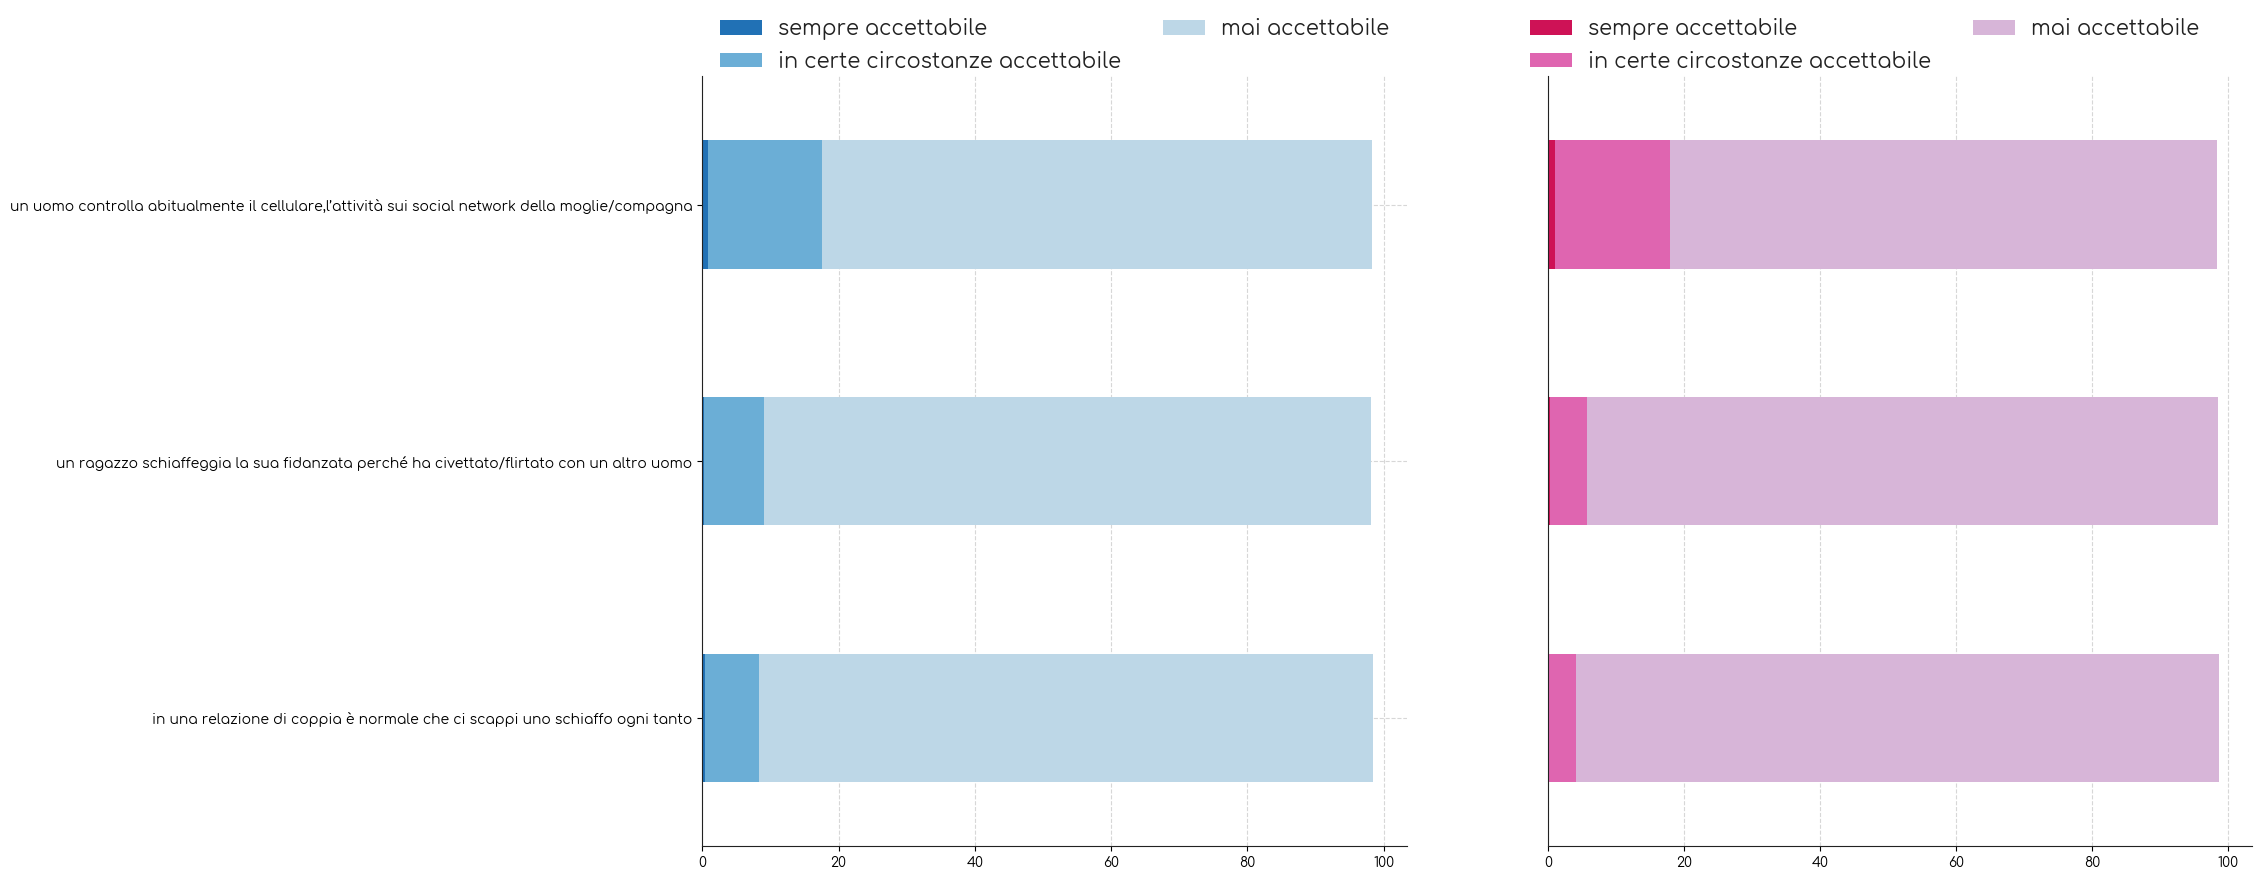

In [7]:
plt.figure(figsize=(20,10))

ax = plt.subplot(121)
df_male_tot.pivot(index="Stereotipi sui ruoli di genere, comportamenti nella coppia", columns="Grado di accettabilità", values="Value")[order].plot.barh(
    stacked=True, color=male_colors, ax=ax)
plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.1), ncol=2, fontsize=15, shadow=False, framealpha=0)
plt.ylabel("")
plt.grid()

ax = plt.subplot(122)

df_female_tot.pivot(index="Stereotipi sui ruoli di genere, comportamenti nella coppia", columns="Grado di accettabilità", values="Value")[order].plot.barh(
    stacked=True, color=female_colors, ax=ax)
plt.legend(loc="upper center",bbox_to_anchor=(0.45, 1.1), ncol=2, fontsize=15, shadow=False, framealpha=0)
plt.yticks([])
plt.ylabel("")
plt.grid()

plt.plot()

In [8]:
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", colors=None, legend_colors=None, figsize=(10,10)):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    fig, axe = plt.subplots(figsize=figsize)

    for i, df in enumerate(dfall) : # for each data frame
        axe = df.plot(kind="barh",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      color=colors[i])  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_y(rect.get_y() + 1 / float(n_df + 1) * i / float(n_col))
                # rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_height(1 / float(n_df + 1))

    axe.set_yticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_yticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color=legend_colors[i], hatch=H * i))

    # l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.6])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.4]) 
    axe.add_artist(l2)
    return axe

In [9]:
df_male_tot_pivot = df_male_tot.pivot(index="Stereotipi sui ruoli di genere, comportamenti nella coppia", columns="Grado di accettabilità", values="Value")[order]
df_female_tot_pivot = df_female_tot.pivot(index="Stereotipi sui ruoli di genere, comportamenti nella coppia", columns="Grado di accettabilità", values="Value")[order]
df_male_tot_pivot

Grado di accettabilità,sempre accettabile,in certe circostanze accettabile,mai accettabile
"Stereotipi sui ruoli di genere, comportamenti nella coppia",,,
in una relazione di coppia è normale che ci scappi uno schiaffo ogni tanto,0.4,7.9,90.2
un ragazzo schiaffeggia la sua fidanzata perché ha civettato/flirtato con un altro uomo,0.3,8.8,89.1
"un uomo controlla abitualmente il cellulare,l’attività sui social network della moglie/compagna",0.8,16.7,80.8


In [10]:
df_male_tot_pivot.index

Index(['in una relazione di coppia è normale che ci scappi uno schiaffo ogni tanto',
       'un ragazzo schiaffeggia la sua fidanzata perché ha civettato/flirtato con un altro uomo',
       'un uomo controlla abitualmente il cellulare,l’attività sui social network della moglie/compagna'],
      dtype='object', name='Stereotipi sui ruoli di genere, comportamenti nella coppia')

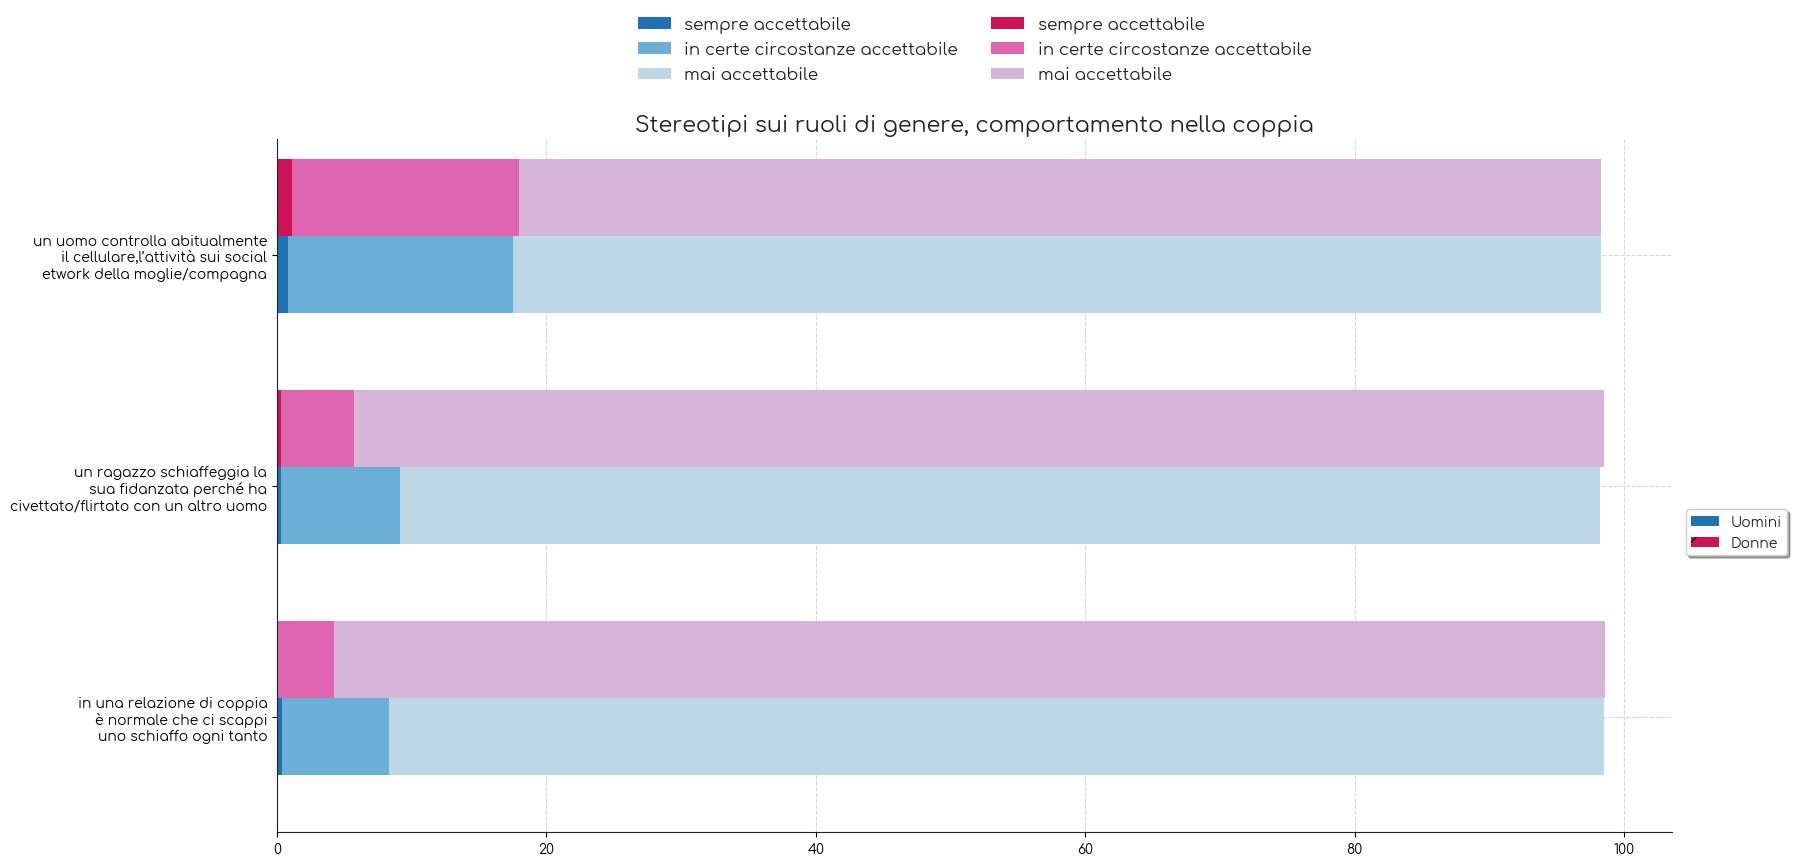

In [11]:
labels_edited = ['in una relazione di coppia\nè normale che ci scappi\nuno schiaffo ogni tanto',
       'un ragazzo schiaffeggia la\nsua fidanzata perché ha\ncivettato/flirtato con un altro uomo',
       'un uomo controlla abitualmente\nil cellulare,l’attività sui social\nnetwork della moglie/compagna']

plot_clustered_stacked([df_male_tot_pivot, df_female_tot_pivot],["Uomini", "Donne"],
                       colors=[male_colors,female_colors],
                       legend_colors=[male_colors[0], female_colors[0]],
                       title="Stereotipi sui ruoli di genere, comportamento nella coppia",
                       figsize=(18,9))

plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=12, shadow=False, frameon=False)
plt.ylabel("")
plt.grid()
plt.xlim(left=0)
plt.yticks(np.arange(3), labels_edited)
plt.show()